# Quiz 4

Name


NetID

Load the packages and import the necessary data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

from plotnine import *
%matplotlib inline

In [2]:
#Import the data for the tutorial

df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.describe()

,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
count,154.000000,162.000000,121.000000,148.000000,88.000000,88.000000,87.000000,91.000000,87.000000,87.000000,123.000000,64.0
mean,30.466232,0.666667,7.066491,8.302509,3.590909,3.636364,1.149425,1.857143,220.926437,4.595984,-1.731106,1.0
std,42.389839,0.472866,1.804287,1.105342,2.414688,2.339967,2.576858,1.823131,411.498260,1.303333,1.083726,0.0
min,0.000000,0.000000,1.636364,6.109248,1.000000,1.000000,0.000000,1.000000,2.550000,0.936093,-3.540459,1.0
25%,0.000000,0.000000,5.886364,7.376192,1.000000,1.750000,0.000000,1.000000,68.350006,4.224609,-2.741120,1.0
50%,1.950000,1.000000,7.045455,8.265764,3.000000,3.000000,0.000000,1.000000,85.000000,4.442651,-1.560648,1.0
75%,91.625000,1.000000,8.272727,9.216228,7.000000,7.000000,1.000000,1.000000,253.259995,5.610119,-0.831277,1.0
max,100.000000,1.000000,10.000000,10.288750,7.000000,7.000000,10.000000,7.000000,2940.000000,7.986165,0.000000,1.0


How do we measure institutional differences and economic outcomes?



Economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates. (logpgp95)

institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the Political Risk Services Group.(avexpr)



# Question 1

Let's get a scatterplot going on. Let's plot a scatterplot that is relevant to the question of how predictive is the index of protection against exploitation to the log GDP per capita. (you might want to drop NANs)

In [4]:
#Drop nans

df1.dropna(inplace=True)

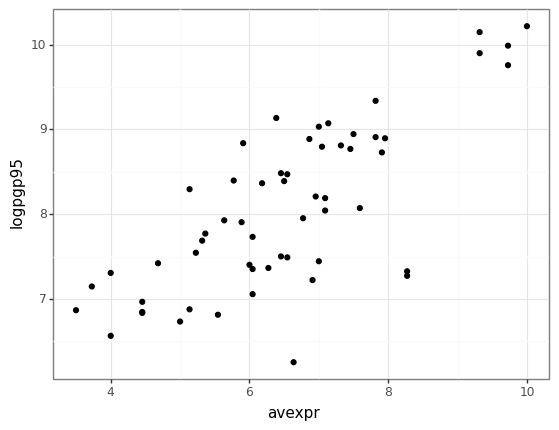

<ggplot: (8770461990181)>

In [8]:
(ggplot(data=df1, mapping=aes(x='avexpr', y='logpgp95'))+
geom_point()+theme_bw())

In [ ]:
The correlation seems high.

# Question 2

Based on the plot above. Compute the regression we need to see the predictability. Print the summary, then print the coefficients on their own. Are they significant?

In [10]:
reg1 = smf.ols('logpgp95 ~ avexpr',df1).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     72.32
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.33e-11
Time:                        19:52:47   Log-Likelihood:                -55.184
No. Observations:                  57   AIC:                             114.4
Df Residuals:                      55   BIC:                             118.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8934      0.383     12.791      0.000       4.127       5.660
avexpr         0.4868      0.057      8.504      0.000       0.372       0.602
==============================================================================
Omnibus:                        8.795   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.140
Skew:                          -0.860   Prob(JB):                       0.0171
Kurtosis:                       3.683   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Coefficients on their own
reg1.params1

Intercept    4.893443
avexpr       0.486835
dtype: float64

Let's see their confidence intervals to assess significance:

In [12]:
reg1.conf_int()


,0,1
Intercept,4.126771,5.660115
avexpr,0.372109,0.601561


The *avexpr* parameter is very significant!

# Question 3

Make a plot of the regression line and the scatterplot. How well do we think the regression line fits the data?

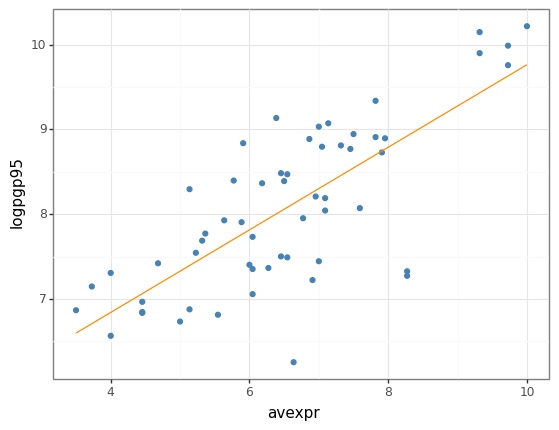

<ggplot: (8770462012567)>

In [13]:
#Saving predictions

pred=reg1.predict()

df1['pred']=pred

#plotting

(ggplot(data=df1, mapping=aes(x='avexpr',
                              y='logpgp95'))+
       geom_point(color='steelblue')+
geom_line(aes(x='avexpr', y='pred'), 
          color='darkorange')+
theme_bw())

Looks excellent!

# Question 4

Can you find another variable that you can use in tandem with avexpr to increase the prediction power of the regression

I will use logem4 which is a log of the unemployment rate

In [14]:


smf.ols('logpgp95 ~ avexpr+logem4',df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     70.37
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           9.11e-16
Time:                        20:00:06   Log-Likelihood:                -42.550
No. Observations:                  57   AIC:                             91.10
Df Residuals:                      54   BIC:                             97.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6420      0.589     12.983      0.000       6.462       8.822
avexpr         0.3280      0.055      6.007      0.000       0.218       0.437
logem4        -0.3627      0.066     -5.489      0.000      -0.495      -0.230
==============================================================================
Omnibus:                       10.931   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.116
Skew:                          -0.799   Prob(JB):                      0.00234
Kurtosis:                       4.597   Cond. No.                         69.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R squared has increased quite a bit and the coefficients are all significant